# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, I'm going to walk-through a machine learning project with the goal of predicting the sales price of bulldozers.

## 1. Problem definition

> How well can I predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data
The data for this competition is split into three parts:

Train.csv is the training set, which contains data through the end of 2011.
Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012. Illu make predictions on this set throughout the majority of the competition.her score on this set is used to create the public leaderboard.
Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the compitn.it


## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
For more info: www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.

##Feature

TeT the full version of s fi can be downloedle directly from the Kaggle competition page (https://www.kaggle.com/c/bluebook-for-bulldozers/download/Bnl6RAHA0enbg0UfAvGA%2Fversions%2FwBG4f35Q8mAbfkzwCeZn%2Ffiles%2FData%20Dictionary.xlsx) (Kaggle account required) or view it on Google Sheets (https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing).ion.

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets
df = pd.read_csv("Data/TrainAndValid.csv",
                low_memory=False)

In [3]:
df.shape

(412698, 53)

Now that training & valididation data is loaded I'll display the columns with the non-null counts and data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

From here I'll want to know the amount of na's that will need to be cleaned / filled per column. 

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

I'll start with a scatter plot of up to 1000 saledate and salesprice data points to see if there's a noticeable pattern.

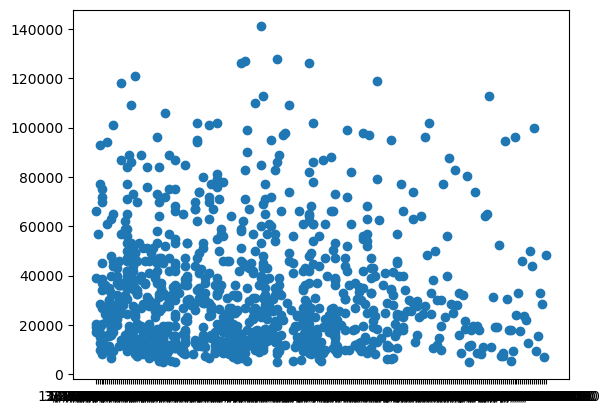

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

The scatter plot is too crowded to see a clear grouping so I'll try a histogram.

<Axes: ylabel='Frequency'>

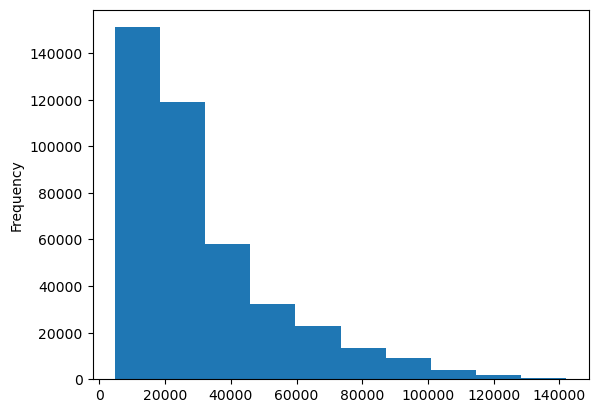

In [7]:
df.SalePrice.plot.hist()

That's much better, now it's clear the majority of our orders/transactions have come from equipment below 20k.

### Parsing dates

When working with time series data, I want to enrich the time & date component as much as possible.

I can do that by telling pandas which of the columns has dates in it using the 'parse_dates' parameter.

In [8]:
# Import data & parse dates
df = pd.read_csv("data/TrainAndValid.csv",
                low_memory=False,
                parse_dates=["saledate"])

In [9]:
df.saledate.dtype

dtype('<M8[ns]')

In [10]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

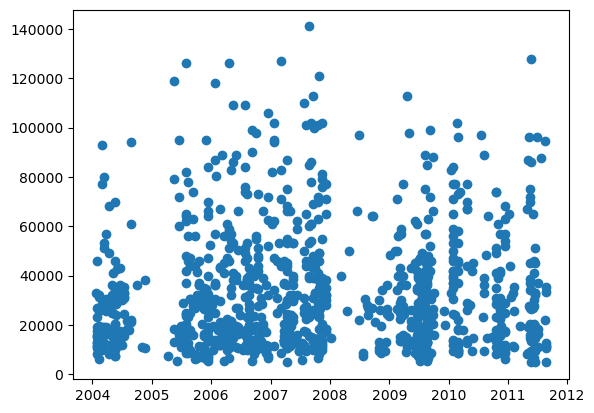

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [12]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [14]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

Make a copy so when I manipulate the copy, there's still original data.

In [15]:
# Make a copy
df_tmp = df.copy()

In [16]:
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [17]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Add datetime parameters for 'saledate' column

In [18]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [19]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [20]:
# Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

Now it's time to start to do some model-driven EDA (Exploratory Data Analysis).

In [21]:
# # Let's build a quick machine learning model.
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42) # n_jobs=-1 means to use as many cores as possible on one cpu
# # fit the model on X (everything except SalePrice) & y (only SalePrice)
# model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

The error comes from some of the data being non-numeric.

In [22]:
# Checking to see
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [23]:
df_tmp["UsageBand"].dtype

dtype('O')

In [24]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

### Convert string to categories

One way I can turn all our data into numbers is converting them into pandas categories.


In [25]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [26]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [27]:
# Find the columns which contain strings
for label, content in df_tmp.items(): # .items treats the dataframe like a dictionary
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [28]:
# If you're wondering what df.items() does, here's an example
random_dict = {"key1": "hello",
              "key2": "world!"}
for key, value in random_dict.items():
    print(f"this is a key: {key}",
         f"this is a value: {value}")

this is a key: key1 this is a value: hello
this is a key: key2 this is a value: world!


In [29]:
# This will turn all the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 12  fi

In [31]:
# since there is a lot of objects left Ican use a broder is_object_dtype to convert the rest
from pandas.api.types import is_object_dtype

for label, content in df_tmp.items():
    if is_object_dtype(content):
        df_tmp[label] = content.astype("category")


In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   category      
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  category      
 11  fiBaseModel               412698 non-null  category      
 12  fi

In [33]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [34]:
df_tmp.state.cat.codes # to see what number the state has been given as a category

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

With Pandas Categories Ican access all the data in the form of numbers.
Still need to deal with the null values.

### Save preprocessed data to new csv

In [35]:
# Expert current tmp dataframe
df_tmp.to_csv("data/train_tmp.csv",
             index=False)

In [36]:
# Import preprocessed
df_tmp = pd.read_csv("data/train_tmp.csv",
                    low_memory=False)
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17,1989-01-31,1989-01-31,1989-01-31,1989-01-31


## Fill Missing Values

### Fill numerical missing values first

In [37]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [38]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [39]:
### Splitting data into train/validation sets

In [40]:
from sklearn.ensemble import RandomForestRegressor
# --------------------------
# 1. Split data
# Split data into training and validation 
# On the data section of the kaggle site for the data set the test data was 2011 & validation data was 2012 so I will split them up based on that.
# --------------------------
# Create 'saleYear' early so we can split on it
df_tmp["saledate"] = pd.to_datetime(df_tmp["saledate"])
df_tmp["saleYear"] = df_tmp["saledate"].dt.year

df_train = df_tmp[df_tmp.saleYear != 2012]
df_valid = df_tmp[df_tmp.saleYear == 2012]

# --------------------------
# 2. Split into X and y
# --------------------------
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_valid.drop("SalePrice", axis=1), df_valid["SalePrice"]


# --------------------------
# 3. Preprocessing function
# --------------------------
# def preprocess_data(df):
#     """
#     Fills missing values and encodes categorical features.
#     Should only be used on the feature set (X).
#     """
#     df = df.copy()
    
#     # I need to fill in the missing categorical variables & turn them into numeric
    
#     for label, content in df.items():
#     # Check if the column is numeric (int or float)
#     if pd.api.types.is_numeric_dtype(content):
#         # Only apply filling logic if there are missing values
#         if pd.isnull(content).sum():
#             # Create a new binary column that flags missing values
#             df[label + "_is_missing"] = pd.isnull(content)
#             # Fill missing values with the median (more robust than the mean for skewed data)
#             df[label] = content.fillna(content.median())
#     else:
#         # For non-numeric (categorical/text) columns:
#         # Add a binary column to indicate which values were missing
#         df[label + "_is_missing"] = pd.isnull(content)
#         # Encode categories as integers; +1 to avoid pandas default -1 for missing values
#         df[label] = pd.Categorical(content).codes + 1

def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum(): # Only run the missing value handling logic if this column actually has any missing values.
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median since it's less influenced by outliers than mean
                df[label] = content.fillna(content.median())

    
    # Fill categorical missing data and turned categories into numbers
        elif not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # I add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    return df

# --------------------------
# 4. Preprocess train/valid sets
# --------------------------
X_train = preprocess_data(X_train)
#Store all column names after training
train_cols = X_train.columns

X_valid = preprocess_data(X_valid)
# Reindex X_valid to match X_train columns
X_valid = X_valid.reindex(columns=train_cols, fill_value=0)


In [41]:
# Check if there's any null numeric values after our median fill
for label, content in X_train.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [42]:
for label, content in X_valid.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [43]:
### Check if there's any nan values

In [44]:
X_train.loc[:, X_train.isna().any()].isna().sum()

Series([], dtype: float64)

In [45]:
X_valid.loc[:, X_valid.isna().any()].isna().sum()

Series([], dtype: float64)

### Now that I dealt with the numerical labels/content fill and turning categorical variables into numbers

Remember I started out with a lot of objects and some numerical data and I converted all the object content to categorical

I now have all data with numeric values and none are missing, I can build a machine learning model.

In [46]:
%%time
# --------------------------
# 5. Train the model
# --------------------------
model = RandomForestRegressor(n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

CPU times: total: 33min 25s
Wall time: 4min 28s


RandomForestRegressor(n_jobs=-1, random_state=42)

### Building an evaluation function

In [47]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds)) #taking the square root of the mean squared log error
# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train) #make predictions on training data & evaluate how it did
    val_preds = model.predict(X_valid) #make predictions on valid data & evaluate how it did
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds), 
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds), 
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [48]:
show_scores(model)

{'Training MAE': 1578.2025454908076,
 'Valid MAE': 11012.510464875138,
 'Training RMSLE': np.float64(0.0842641288386881),
 'Valid RMSLE': np.float64(0.4923121929084922),
 'Training R^2': 0.987515142490979,
 'Valid R^2': 0.49114587736247994}

## Testing our model on a subset (to tune the hyperparameters). This is not a final score.

In [49]:
# # The way I did before takes too long for experimenting
# %%time
# model = RandomForestRegressor(n_jobs=-1, 
#                               random_state=42)
# # Fit the model
# model.fit(X_train, y_train)

In [50]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples = 10000)
model

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [51]:
%%time
# Cutting down on the max number of samples 
model.fit(X_train, y_train)

CPU times: total: 1min 15s
Wall time: 10.2 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [52]:
show_scores(model)

{'Training MAE': 5561.286907148645,
 'Valid MAE': 9792.934450877043,
 'Training RMSLE': np.float64(0.2577478749317532),
 'Valid RMSLE': np.float64(0.3901355992372278),
 'Training R^2': 0.8606644092878912,
 'Valid R^2': 0.661834841571406}

### Hyperparameter tuning the RandomForestRegressor model with RandomizedSearchCV

In [53]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt", "auto"],
          "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions=rf_grid,
                             n_iter=2,
                             cv=5,
                             verbose=True)
# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 46.7 s
Wall time: 15.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [54]:
# Find the best model hyperparameters
best_params = rs_model.best_params_
best_params

{'n_estimators': np.int64(40),
 'min_samples_split': np.int64(14),
 'min_samples_leaf': np.int64(13),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 5}

In [55]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 9806.519228747862,
 'Valid MAE': 12759.637338717626,
 'Training RMSLE': np.float64(0.4220841138734554),
 'Valid RMSLE': np.float64(0.4948506977117461),
 'Training R^2': 0.6235169069346203,
 'Valid R^2': 0.5376600246863693}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of 'RandomizedSearchCV.'

In [56]:
%%time

# Add any extra defaults to the best params
best_params["n_jobs"] = -1
best_params["random_state"] = 42
best_params["max_samples"] = None

# Create model with best params
ideal_model = RandomForestRegressor(**best_params)

# Fit the model
ideal_model.fit(X_train, y_train)

CPU times: total: 1min 46s
Wall time: 14.3 s


RandomForestRegressor(max_depth=5, max_features=0.5,
                      min_samples_leaf=np.int64(13),
                      min_samples_split=np.int64(14), n_estimators=np.int64(40),
                      n_jobs=-1, random_state=42)

In [57]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 9797.925254018624,
 'Valid MAE': 12731.40909974128,
 'Training RMSLE': np.float64(0.4191952152998879),
 'Valid RMSLE': np.float64(0.49024672980533485),
 'Training R^2': 0.6208149364930079,
 'Valid R^2': 0.5311200072114799}

In [58]:
# Scores on rs_model (only trained on ~10,000 examples)
show_scores(rs_model)

{'Training MAE': 9806.51922874786,
 'Valid MAE': 12759.637338717626,
 'Training RMSLE': np.float64(0.4220841138734554),
 'Valid RMSLE': np.float64(0.4948506977117461),
 'Training R^2': 0.6235169069346203,
 'Valid R^2': 0.5376600246863694}

### The hyperparameter tuning didn't improve the score so let's try the XGB model.

In [59]:
%%time
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score
import numpy as np

def rmsle(y_true, y_pred):
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def evaluate_model(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    
    return {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, val_preds),
        "Training RMSLE": rmsle(y_train, train_preds),
        "Valid RMSLE": rmsle(y_valid, val_preds),
        "Training R²": r2_score(y_train, train_preds),
        "Valid R²": r2_score(y_valid, val_preds)
    }

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=6, subsample=1.0, colsample_bytree=0.7, random_state=42, n_jobs=-1)
xgb_scores = evaluate_model(xgb_model, X_train, y_train, X_valid, y_valid)
xgb_results = pd.DataFrame([xgb_scores], index=["XGBRegressor"]).T
xgb_results
#xgb_scores = evaluate_model(xgb_model, X_train_top, y_train, X_valid_top, y_valid)

CPU times: total: 1min 12s
Wall time: 11.1 s


,XGBRegressor
Training MAE,4823.781750
Valid MAE,10382.790943
Training RMSLE,0.239543
Valid RMSLE,0.404423
Training R²,0.899335
Valid R²,0.655222


In [60]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define parameter grid
xgb_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.3],
    "max_depth": [3, 5, 6, 10],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

# Initialize model
xgb = XGBRegressor(n_jobs=-1, random_state=42)

# Run RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=100,
    cv=3,
    scoring="r2",
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
xgb_search.fit(X_train, y_train)

# Extract best parameters
best_params = xgb_search.best_params_
print("Best XGB Parameters:", best_params)

# Optionally re-add any defaults
best_params["n_jobs"] = -1
best_params["random_state"] = 42

# Rebuild the model manually using the best parameters
ideal_xgb = XGBRegressor(**best_params)

# Fit the ideal model (like with RandomForest)
ideal_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best XGB Parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
CPU times: total: 3h 48min 17s
Wall time: 38min 7s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=-1, num_parallel_tree=None, ...)

In [61]:
### Commenting out because I want to try the regular RandomSearchCV to up the score

In [62]:
# %%time
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingRandomSearchCV
# from xgboost import XGBRegressor

# # Define parameter grid
# xgb_param_grid = {
#     "n_estimators": [100, 200, 300],
#     "learning_rate": [0.01, 0.05, 0.1, 0.3],
#     "max_depth": [3, 5, 6, 10],
#     "subsample": [0.7, 0.8, 1.0],
#     "colsample_bytree": [0.5, 0.7, 1.0]
# }

# # Initialize model
# xgb = XGBRegressor(n_jobs=-1, random_state=42)

# # Run RandomizedSearchCV
# xgb_search = HalvingRandomSearchCV(
#     estimator=xgb,
#     param_distributions=xgb_param_grid,
#     factor=3,  # controls resource allocation
#     scoring='r2',
#     random_state=42,
#     n_jobs=-1,
#     verbose=3,
#     cv=3
# )

# # Approach 1
# # Fit RandomizedSearchCV
# xgb_search.fit(X_train, y_train)

# # Extract best parameters
# best_params = xgb_search.best_params_
# print("Best XGB Parameters:", best_params)

# # Optionally re-add any defaults
# best_params["n_jobs"] = -1
# best_params["random_state"] = 42

# # Rebuild the model manually using the best parameters
# ideal_xgb = XGBRegressor(**best_params)

# # Fit the ideal model (like with RandomForest)
# ideal_xgb.fit(X_train, y_train)

In [63]:
# Re-Display the results from the original XGB model
xgb_results

,XGBRegressor
Training MAE,4823.781750
Valid MAE,10382.790943
Training RMSLE,0.239543
Valid RMSLE,0.404423
Training R²,0.899335
Valid R²,0.655222


In [64]:
#  Evaluate the tuned model (ideal_xgb) on full train/validation
best_xgb_scores = evaluate_model(ideal_xgb, X_train, y_train, X_valid, y_valid)
pd.DataFrame(best_xgb_scores, index=["Tuned XGBRegressor"]).T

,Tuned XGBRegressor
Training MAE,4077.563509
Valid MAE,10480.209602
Training RMSLE,0.200877
Valid RMSLE,0.398475
Training R²,0.928201
Valid R²,0.648355


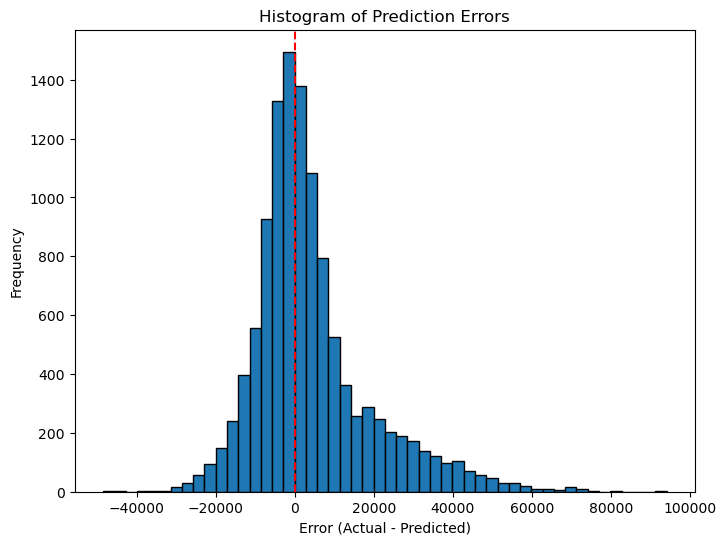

In [65]:
best_xgb_model_preds = ideal_xgb.predict(X_valid)

errors = y_valid - best_xgb_model_preds

plt.figure(figsize=(8, 6))
plt.hist(errors, bins=50, edgecolor='black')
plt.axvline(0, color='red', linestyle='--')
plt.title("Histogram of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()

### Make predictions on test data

In [66]:
# Load the test data
df_test = pd.read_csv("data/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [67]:
df_test.shape

(12457, 52)

In [86]:
# Make predictions on the test dataset
test_preds = ideal_xgb.predict(df_test)

I run into an error due to potentially missing values and non-numeric values

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [87]:
# Process test data
df_test["saledate"] = pd.to_datetime(df_test["saledate"])
df_test["saleYear"] = df_test["saledate"].dt.year
df_test = preprocess_data(df_test)
df_test

KeyError: 'saledate'

In [ ]:
df_test.info()

In [ ]:
X_train.head()

In [ ]:
# Make predictions on updated test data
test_preds = ideal_xgb.predict(df_test)

In [ ]:
# I can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

In [ ]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

In [ ]:
df_test = df_test[X_train.columns]

Now that our dataframe has the same features as our training dataframe I can make predictions.

In [88]:
# Make predictions on the test data
test_preds = ideal_xgb.predict(df_test)

In [89]:
test_preds

array([21298.104, 15342.757, 45269.35 , ..., 12430.45 , 17125.994,
       32070.168], shape=(12457,), dtype=float32)

In [90]:
# Format predictions
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"] # match the blank dataframe salesid column to the df_test sales id
df_preds["SalesPrice"] = test_preds # match the sales price to the predictions
df_preds

,SalesID,SalesPrice
0,1227829,21298.103516
1,1227844,15342.756836
2,1227847,45269.351562
3,1227848,59994.535156
4,1227863,43983.105469
...,...,...
12452,6643171,42535.027344
12453,6643173,14845.057617
12454,6643184,12430.450195
12455,6643186,17125.994141


In [91]:
# Export prediction data
df_preds.to_csv("data/test_predictions", index=False)

### Feature Importance

Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable** (SalePrice).

In [92]:
# Find feature importance of our best model
# ideal_xgb.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": ideal_xgb.feature_importances_
}).sort_values("Importance", ascending=False)

feature_importance_df.head(15)

,Feature,Importance
84,Scarifier_is_missing,0.426349
88,Coupler_System_is_missing,0.144098
37,Coupler_System,0.067585
64,ProductSize_is_missing,0.035149
89,Grouser_Tracks_is_missing,0.034620
26,Blade_Extension,0.024376
13,ProductSize,0.022650
38,Grouser_Tracks,0.021130
27,Blade_Width,0.017267
39,Hydraulics_Flow,0.016114


In [93]:
X_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4537,1735,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1800,557,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2324,711,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1799,556,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2095,681,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6260687,1074871,4331,149,2.0,1000,0.0,0,3098,1049,...,True,True,True,True,True,True,True,True,False,False
401121,6312170,1812622,9580,149,2.0,2005,0.0,0,4458,1675,...,True,True,True,True,True,True,True,True,True,True
401122,6312727,1811599,9580,149,2.0,2005,0.0,0,4458,1675,...,True,True,True,True,True,True,True,True,True,True
401123,6315051,1858173,17432,149,2.0,2004,0.0,0,3348,1169,...,True,True,True,True,True,True,True,True,True,True


In [96]:
# Helper function for plotting feature importance
# def plot_features(columns, importances, n=20):
#     # Create a DataFrame using the provided column names and their corresponding importances.
#     # The DataFrame has two columns: "features" and "feature_importances".
#     df = pd.DataFrame({"features": columns, "feature_importances": importances})
    
#     # Sort the DataFrame by feature importances in descending order, so the most important features come first.
#     # Reset the index after sorting to make plotting easier.
#     df = df.sort_values("feature_importances", ascending=False).reset_index(drop=True)
    
#     # Create a matplotlib figure and axis for the bar chart.
#     fig, ax = plt.subplots()
    
#     # Create a horizontal bar chart (barh) for the top n features.
#     # Using [:n] ensures we display only the top 'n' features based on importance.
#     ax.barh(df["features"][:n], df["feature_importances"][:n])
    
#     # Label the y-axis as "Features" (which will list the feature names).
#     ax.set_ylabel("Features")
    
#     # Label the x-axis as "Feature importance" (which shows the importance values).
#     ax.set_xlabel("Feature importance")
    
#     # Invert the y-axis so that the feature with the highest importance appears at the top.
#     ax.invert_yaxis()
    
#     # Display the plot.
#     plt.tight_layout()
#     plt.show()

def plot_features(columns, importances, n=10):
    df = pd.DataFrame({"features": columns, "feature_importances": importances})
    df = df.sort_values("feature_importances", ascending=False).reset_index(drop=True)

    # Set flat, wide display like the example image
    fig, ax = plt.subplots(figsize=(10, 6))  # 10in wide, 6in tall fixed

    ax.barh(df["features"][:n], df["feature_importances"][:n], color="#1f77b4")
    ax.set_xlabel("Feature importance")
    ax.set_ylabel("Features")
    ax.set_title(f"Top {n} Important Features")
    ax.invert_yaxis()

    plt.tight_layout()
    plt.show()



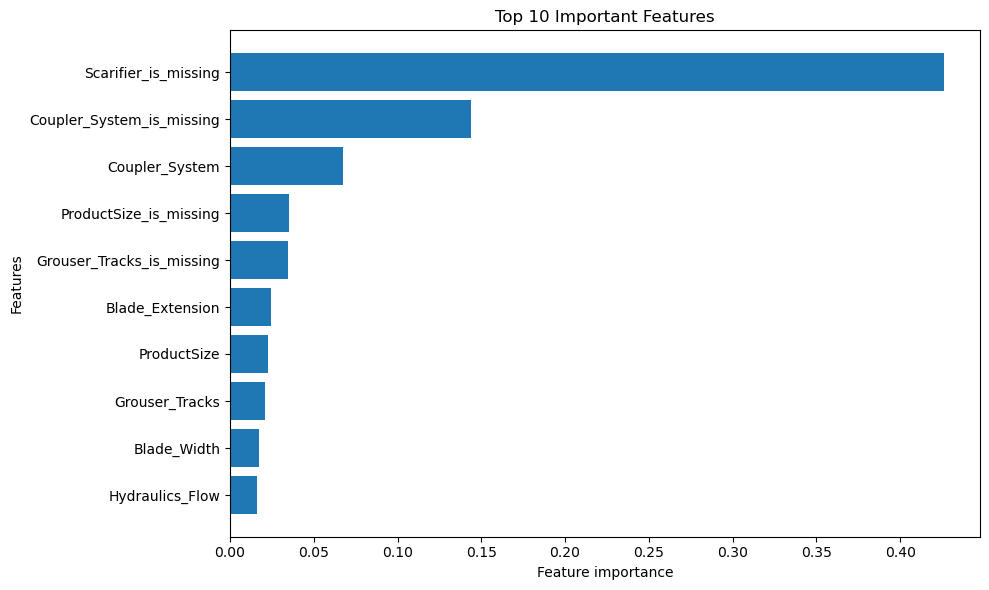

In [97]:
plot_features(X_train.columns, ideal_xgb.feature_importances_)

Now I can see how YearMade, ProductSize & saleYear are the most important features to predicting the price.